## Задание 1

In [239]:
import pandas as pd
import numpy as np

In [240]:
from sklearn.datasets import load_boston

In [241]:
boston = load_boston()

In [242]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [243]:
data = boston['data']
feature_names = boston['feature_names']

In [244]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [245]:
target = boston['target']

In [246]:
X = pd.DataFrame(data, columns = feature_names)

In [247]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [248]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [249]:
y = pd.DataFrame(target, columns = ['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [250]:
###Разбиваем на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split 

In [251]:
train_test_split?

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [253]:
###Создаем модель линейной регрессии
from sklearn.linear_model import LinearRegression

##### Подгружаем модель в переменную lr

In [254]:
lr = LinearRegression()

##### Обучаем(оцениваем коэффициенты методом МНК) модель линейной регрессии при помощи  

In [255]:
lr.fit(X_train, y_train)

LinearRegression()

In [256]:
lr?

##### Получаем предсказанные y на объектах X_test

In [257]:
y_pred = lr.predict(X_test)

In [258]:
from sklearn.metrics import r2_score

In [259]:
r2_score?

##### Посчитаем r2_score

In [260]:
R2 = r2_score(y_test,y_pred)
R2

0.7112260057484973

In [261]:
check_test = pd.DataFrame({
    "y_test": y_test['price'],
    "y_pred": y_pred.flatten()
})

In [262]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

##### Расчитаем mean squared error(mse)

In [263]:
mse = (check_test['error']**2).mean()
pd.to_numeric(mse)

21.517444231176913

In [264]:
from sklearn.metrics import mean_squared_error


In [265]:
mean_squared_error(check_test['y_test'], check_test['y_pred'])

21.51744423117691

##### Расчитаем mean absolute error(mae)

In [266]:
(np.abs(check_test['error'])).mean()

3.162709871457362

In [267]:
from sklearn.metrics import mean_absolute_error

In [268]:
mean_absolute_error(check_test['y_test'], check_test['y_pred'])

3.1627098714573627

In [269]:
type(X_describe.columns)

pandas.core.indexes.base.Index

In [270]:
X_describe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [271]:
X_describe = X_train.describe()
lr_coef = pd.DataFrame(lr.coef_.flatten(), index = X_describe.columns, columns = ['lr_coef'])

In [272]:
X_describe.shape
pd.Series(all(lr_coef.T))
lr_coef = lr_coef.T
lr_coef.shape
X_describe.shape

(8, 13)

In [273]:
pd.concat([lr_coef, X_describe]) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
lr_coef,-0.133470,0.035809,0.049523,3.119835,-15.417061,4.057199,-0.010821,-1.385998,0.242727,-0.008702,-0.910685,0.011794,-0.547113
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Задание 2

In [324]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [331]:
reg = RandomForestRegressor(
                  n_estimators = 1000,
                  max_depth = 12,
                  random_state = 42)

In [332]:
y_train

,price
5,28.7
116,21.2
45,19.3
16,23.1
468,19.1
...,...
106,19.5
270,21.1
348,24.5
435,13.4


In [334]:
reg.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [335]:
y_pred = reg.predict(X_test)

In [336]:
R2_RF = r2_score(y_test, y_pred)
R2_RF

0.87472606157312

##### R2_RF > R2 Следовательно случайный лес в данном примере работает лучше обычной линейной регрессии. 


### Задание 3*

In [306]:
from sklearn.ensemble import RandomForestRegressor as rsr
from matplotlib import pyplot as plt
import seaborn as sns

In [304]:
clf?

In [303]:
rsr.feature_importances_?

Если нам интересно узнать о том, какие признаки являются самыми важными для RF-модели, мы можем визуализировать и квантифицировать показатели важности признаков, обратившись к атрибуту feature_importances_:


In [311]:
clf.feature_importances_
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

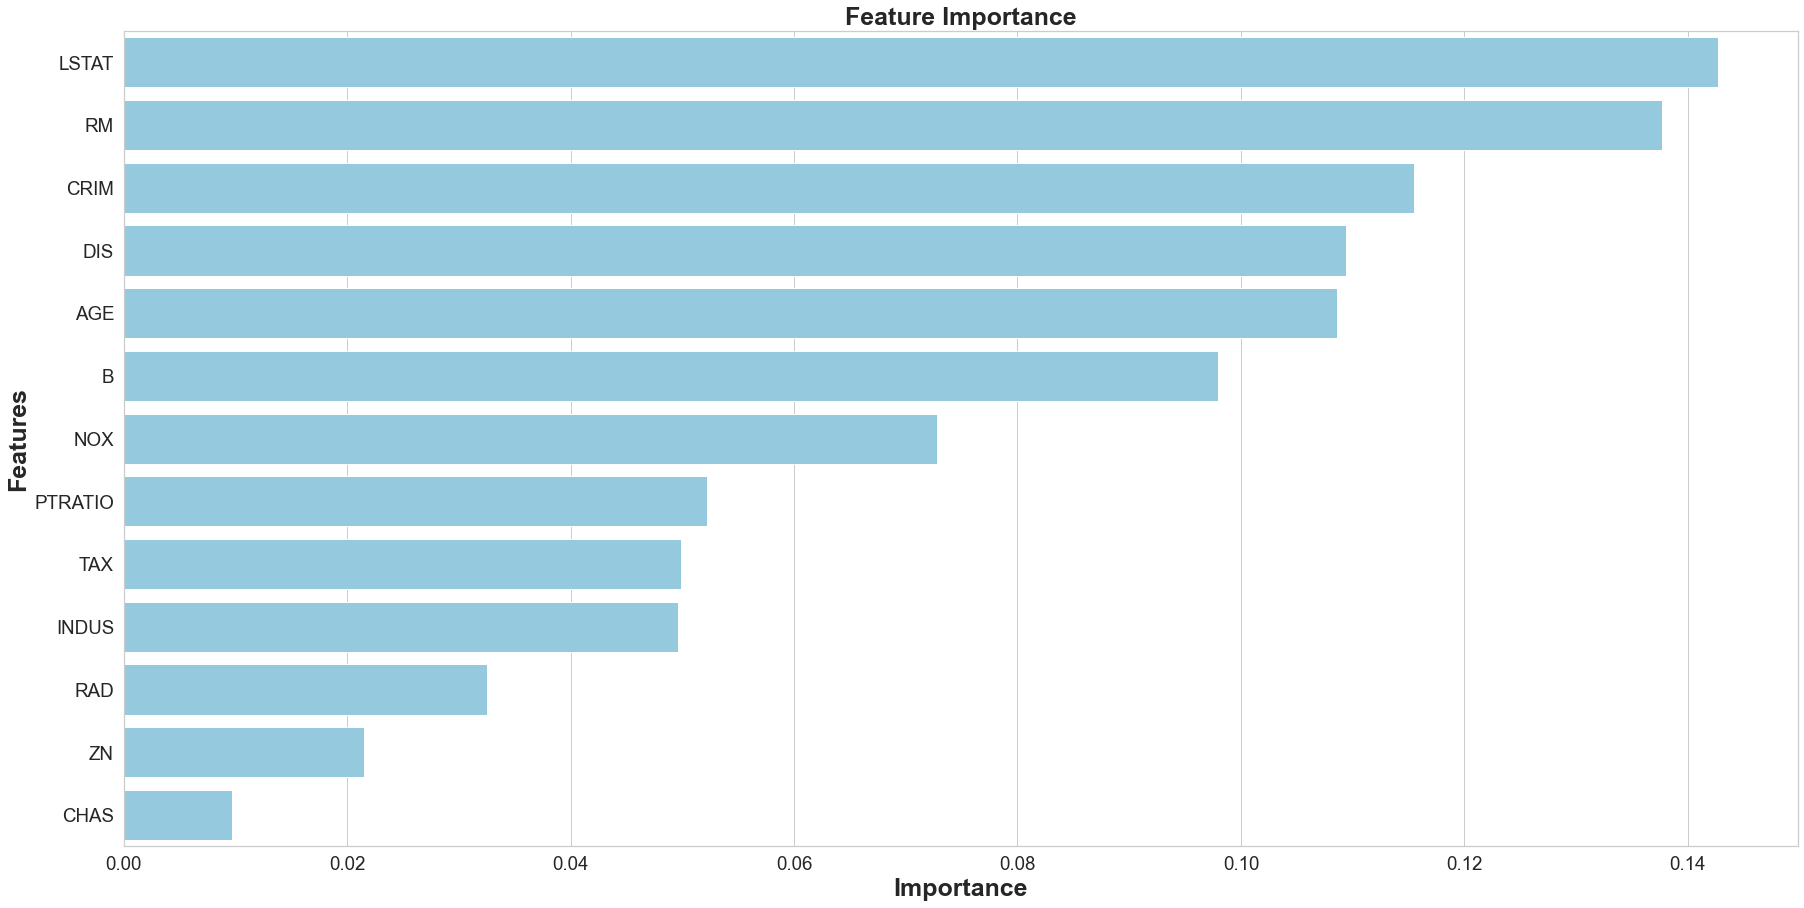

In [319]:
feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

plt.show()

#### Очеведно что наиболее важными признаками являются LSTAT и RM

### *Задание 4
## Не успел :(